## Analysis of Popular Tiktok Songs

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)

saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [14]:
filepath = 'tiktok-data/TikTok_songs_2022.csv'
tiktok_songs = pd.read_csv(filepath)
print("done")

done


In [15]:
tiktok_songs.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

<AxesSubplot:>

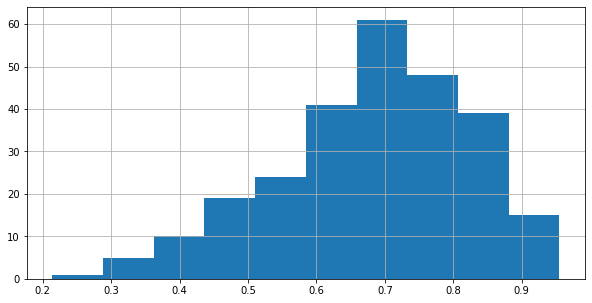

In [17]:
tiktok_songs.energy.hist()

In [23]:
# Initialize plot with polar coordinates.
tiktok_songs.time_signature.pie()

AttributeError: 'Series' object has no attribute 'pie'